# Seriation

In [2]:
# | echo: false
# | output: false

# load_ext autoreload
# autoreload 2


## インポート

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import os


In [4]:
# 自作関数のインポート

from seriation import save_clustermap_all


`sns.clustermap`はデフォルトでは`method="single"`(最近隣法), `metric="euclidean"`でクラスタリングを行う

## 下三角行列 + ノイズ の行・列をシャッフルしたデータフレーム 

下三角行列+ノイズのデータフレームを作成

<AxesSubplot: >

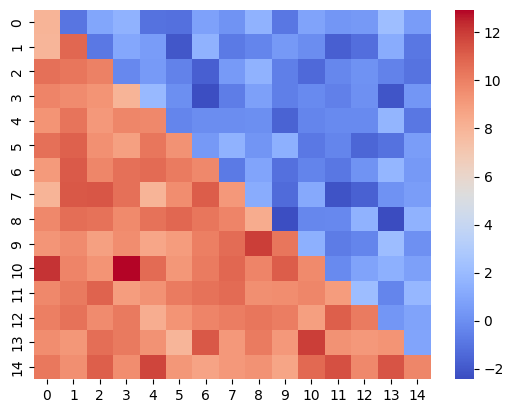

In [5]:
size = 15
df_tri = pd.DataFrame(np.tri(size)) * 10 + np.random.randn(size, size)

sns.heatmap(df_tri, cmap="coolwarm")


行と列をシャッフル

<AxesSubplot: >

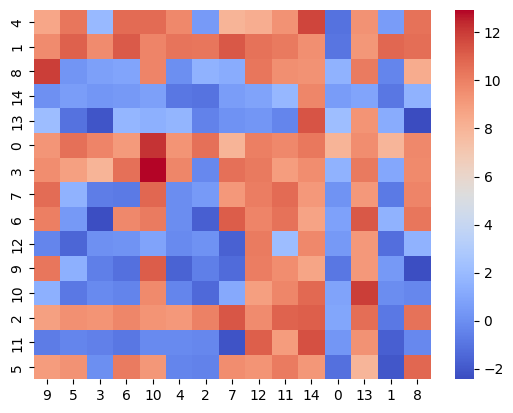

In [6]:
df_tri_shufful = df_tri.sample(frac=1.0).T.sample(frac=1.0)
sns.heatmap(df_tri_shufful, cmap="coolwarm")


様々な`metric`と`method`の組み合わせで`clustermap`

In [7]:
path_fig = "./fig/tri.png"
save_clustermap_all(df_tri_shufful, path_fig)


![tri](./fig/tri.png)

In [8]:
# | echo: false
# | output: false

del df_tri
del df_tri_shufful
gc.collect()


40

In [9]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## diamonds

In [10]:
df_diamonds: pd.DataFrame = sns.load_dataset("diamonds")
df_diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df_diamonds.describe(include="all")


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


`color`と`clarity`をクロス集計してヒートマップを作成する

<AxesSubplot: xlabel='clarity', ylabel='color'>

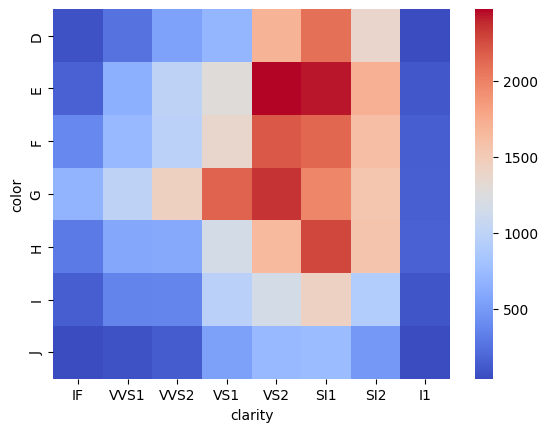

In [12]:
(
    df_diamonds[["color", "clarity"]]
    .value_counts()
    .unstack()
    .pipe(sns.heatmap, cmap="coolwarm")
)


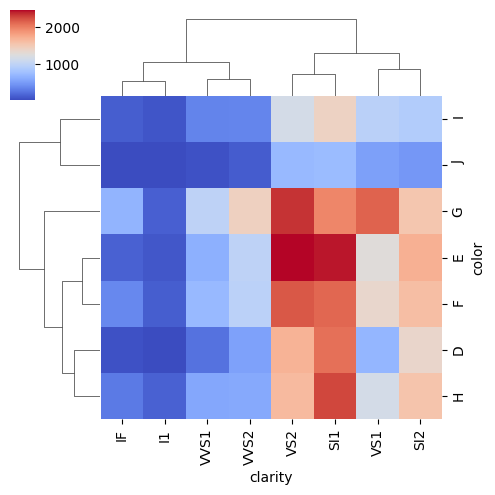

In [13]:
(
    df_diamonds[["color", "clarity"]]
    .value_counts()
    .unstack()
    .pipe(sns.clustermap, cmap="coolwarm", figsize=(5, 5))
)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


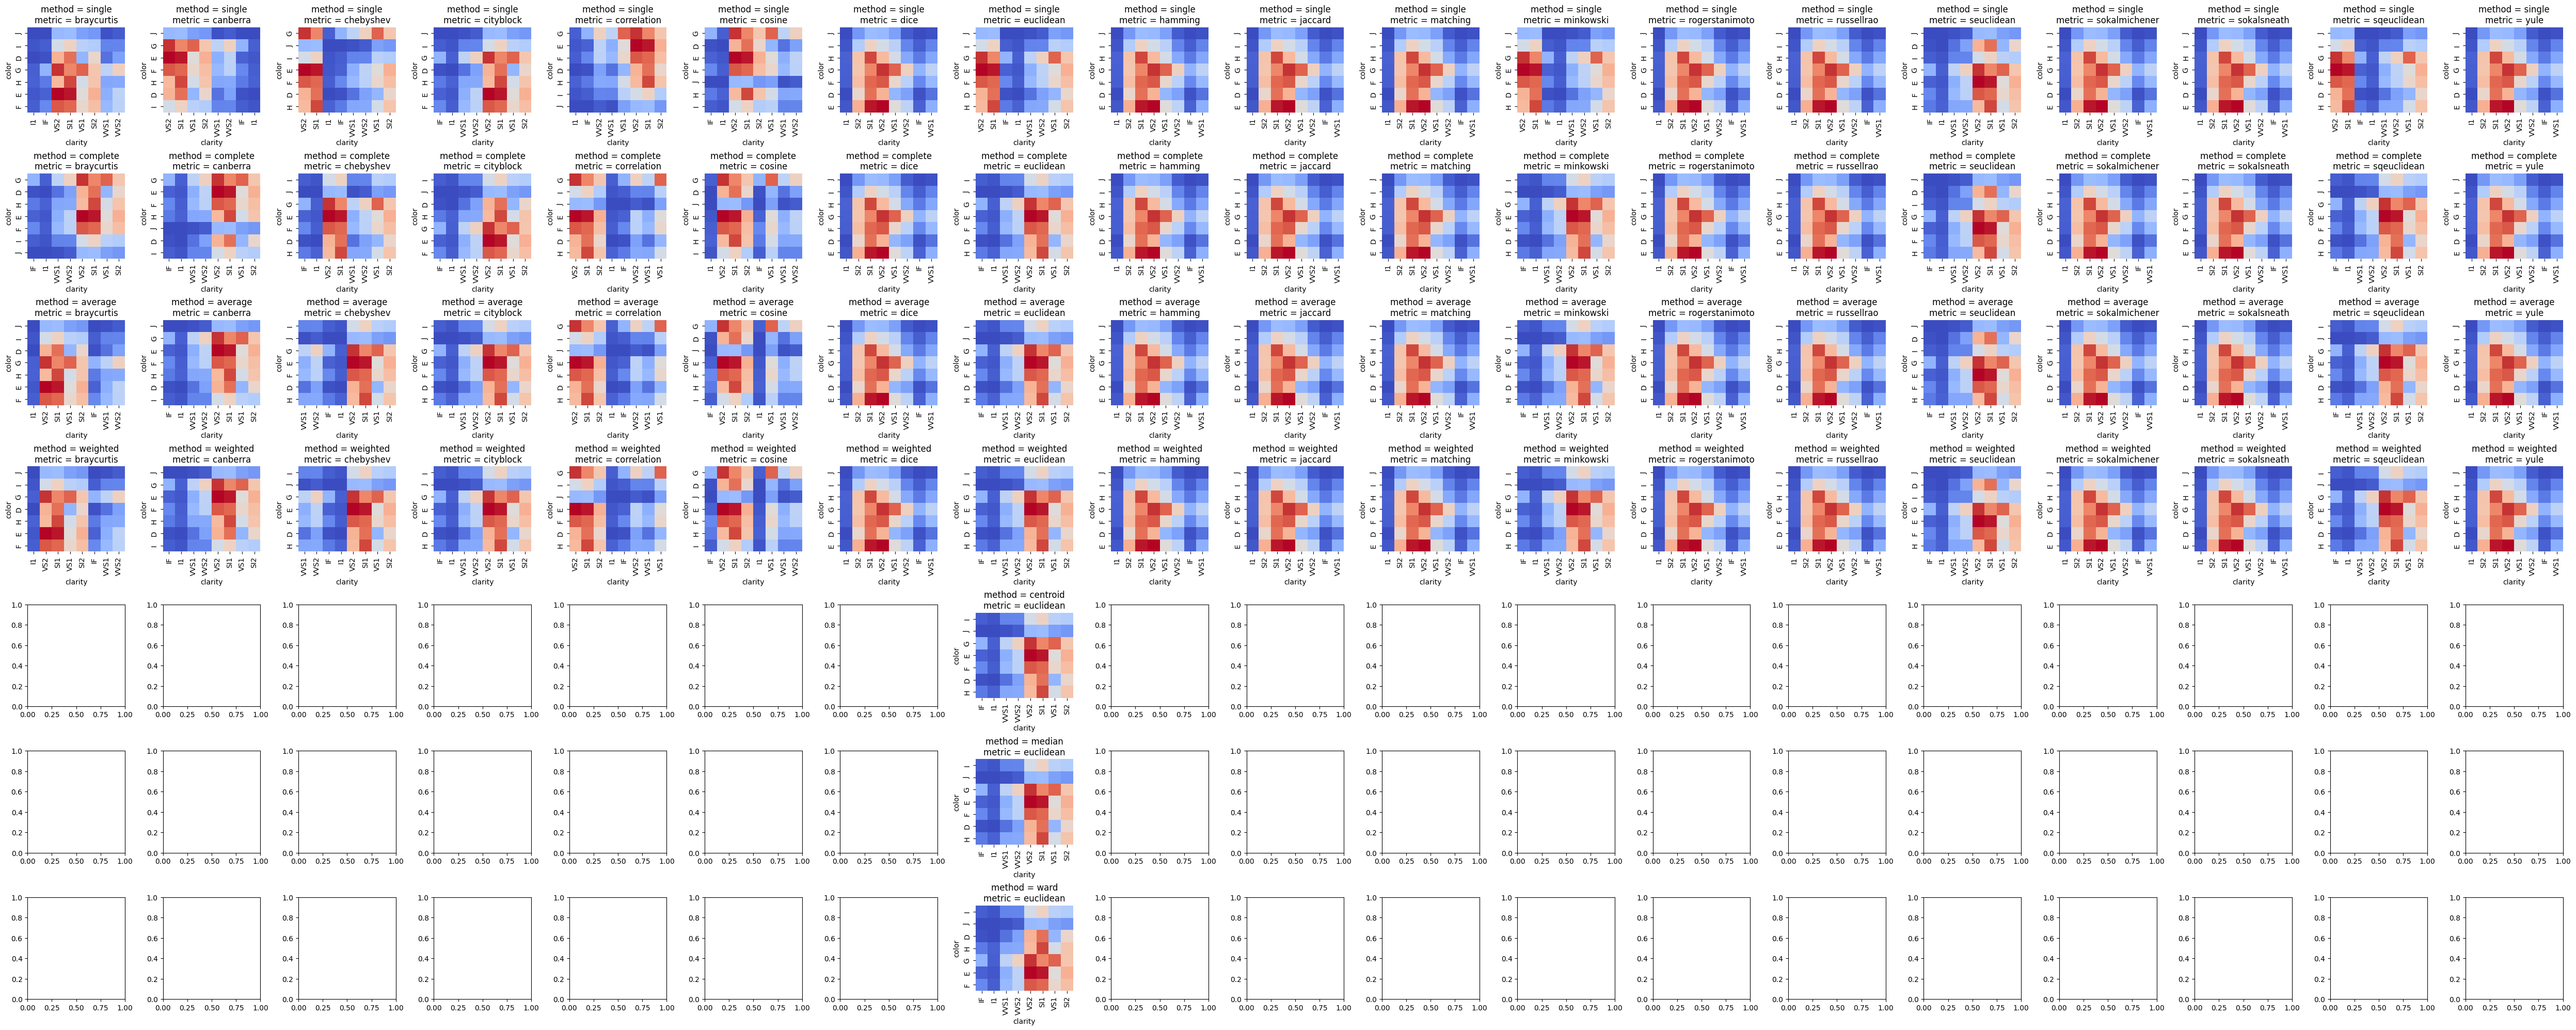

In [14]:
path_fig = "./fig/diamonds.png"

df_diamonds_crosstab = (
    df_diamonds[["color", "clarity"]]
    .value_counts()
    .unstack()
)
save_clustermap_all(df_diamonds_crosstab, path_fig)

![diamonds](./fig/diamonds.png)

## iris

In [15]:
df_iris: pd.DataFrame = sns.load_dataset("iris")
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df_iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: >

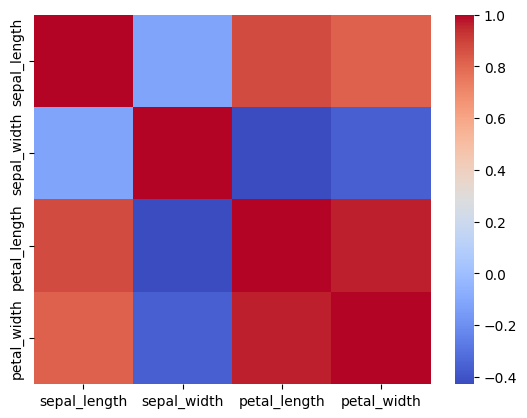

In [17]:
df_iris_corr = df_iris.select_dtypes("number").corr()
sns.heatmap(df_iris_corr, cmap="coolwarm")


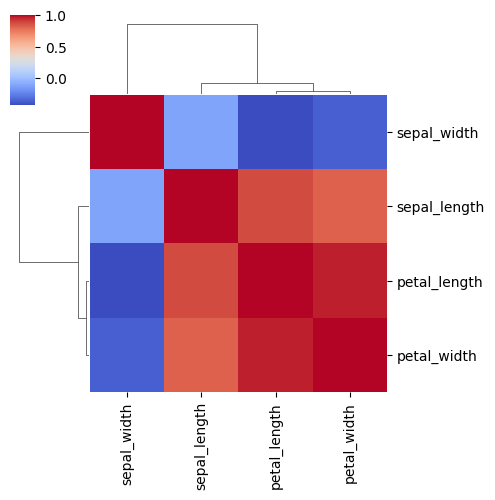

In [18]:
df_iris_corr = df_iris.select_dtypes("number").corr()
sns.clustermap(
    df_iris_corr,
    cmap="coolwarm",
    method="single",
    metric="euclidean",
    figsize=(5, 5),
)


In [19]:
path_fig = "./fig/iris.png"
save_clustermap_all(df_iris_corr, path_fig)


![iris](./fig/iris.png)

In [20]:
# | output: false
# | echo: false

del df_iris
del df_iris_corr
gc.collect()


401402

## tips

In [21]:
df_tips: pd.DataFrame = sns.load_dataset("tips")
df_tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df_tips.describe(include="all")


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


性別x喫煙者と曜日x時間帯でチップの額をクロス集計したものをヒートマップでみてみる

<AxesSubplot: xlabel='day-time', ylabel='sex-smoker'>

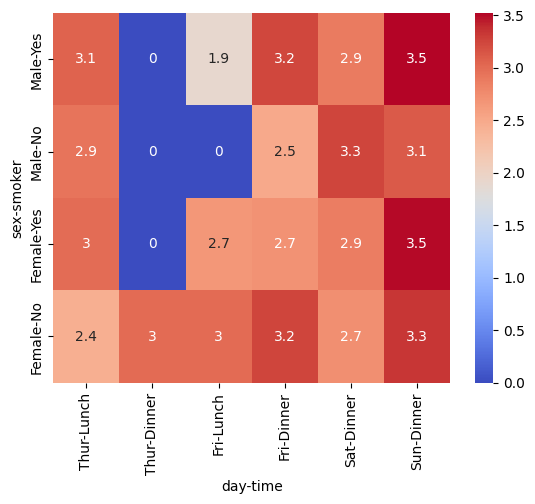

In [23]:
(
    df_tips.pivot_table(
        columns=["day", "time"],
        index=["sex", "smoker"],
        values="tip",
        aggfunc="mean",
        fill_value=0,
    ).pipe(sns.heatmap, cmap="coolwarm", annot=True)
)


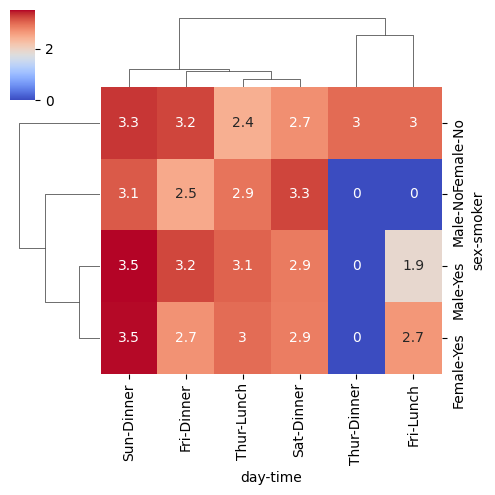

In [24]:
(
    df_tips.pivot_table(
        columns=["day", "time"],
        index=["sex", "smoker"],
        values="tip",
        aggfunc="mean",
        fill_value=0,
    ).pipe(sns.clustermap, figsize=(5, 5), cmap="coolwarm", annot=True)
)


- 人の属性の軸(sex-smoker)
    - 性別よりも喫煙者か否かのほうが関係が深い
- 時間の軸(day-time)
    - Dinnerはtipが多く、Lunchは少ない傾向にあるが、木曜日はその逆になっている